In [10]:

import pandas as pd
import math
%matplotlib inline
import numpy as np
import pytz
from pytz import timezone

import scipy.stats as stats
import matplotlib.pyplot as plt

def hr_func(ts):
    return ts.hour

df = pd.read_table('data/nyc_streamed_dataset.txt', index_col=None)
df['eastern_time'] = pd.DatetimeIndex(pd.to_datetime(df.tweet_time)).tz_localize('UTC').tz_convert('US/Eastern')
df['hours'] = df['eastern_time'].apply(hr_func)
df['weekday'] = df['eastern_time'].dt.dayofweek
df['day_hour'] = df['weekday']*24 +  df['hours']
df.head()
#dropping rows for which we got invalid uber_estimate
df= df[df.uber_estimate > -1]
df.shape

(11013, 11)

(-1, 24)

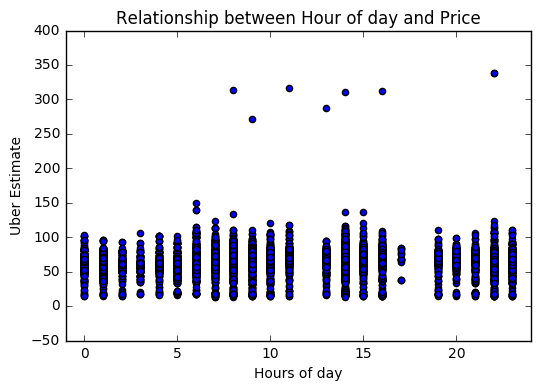

In [11]:
plt.scatter(df.hours, df.uber_estimate)
plt.xlabel("Hours of day")
plt.ylabel("Uber Estimate")
plt.title("Relationship between Hour of day and Price")
plt.xlim([-1,24])

(-1, 7)

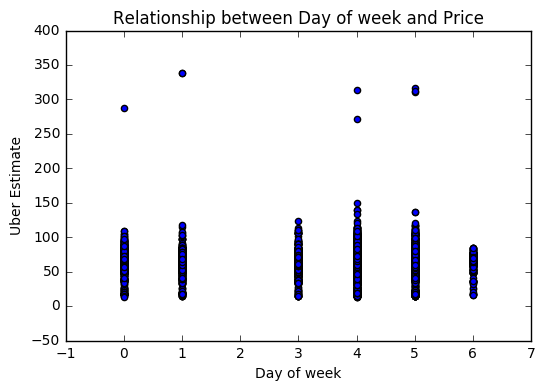

In [12]:
plt.scatter(df.weekday, df.uber_estimate)
plt.xlabel("Day of week")
plt.ylabel("Uber Estimate")
plt.title("Relationship between Day of week and Price")
plt.xlim([-1,7])

(-1, 168)

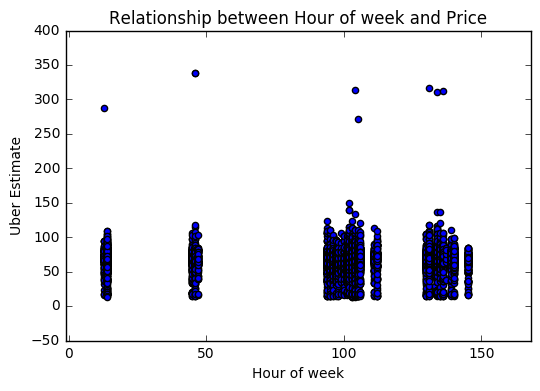

In [13]:
plt.scatter(df.day_hour, df.uber_estimate)
plt.xlabel("Hour of week")
plt.ylabel("Uber Estimate")
plt.title("Relationship between Hour of week and Price")
plt.xlim([-1,168])

In [14]:
bag_of_words = ['Construction','Ramp','Road','Incident','Accident','traffic','Friday','saturday','weekend', 'Terminal']
pattern = '|'.join(bag_of_words)
df['Is_Traffic_Related'] = df['tweet_text'].str.contains(pattern,case=False)
df.head()

,tweet_id,tweet_time,tweet_text,tweet_coordinates,lat_origin,long_origin,uber_estimate,eastern_time,hours,weekday,day_hour,Is_Traffic_Related
0,832427752640888832,2017-02-16 22:13:36-05:00,Yeezus gospel #tbt @ Madison Square Garden htt...,"[40.75079924, -73.99297235]",40.750799,-73.992972,70.0,2017-02-16 22:13:36-05:00,22,3,94,False
1,832427768793141248,2017-02-16 22:13:40-05:00,"GNW! @ New York, New York https://t.co/Sqpnij3q4k","[40.7142, -74.0064]",40.714200,-74.006400,79.0,2017-02-16 22:13:40-05:00,22,3,94,False
2,832427788166635521,2017-02-16 22:13:45-05:00,Soulful Southern blues bass #guitar by @thatab...,"[40.7471587, -73.99463981]",40.747159,-73.994640,73.0,2017-02-16 22:13:45-05:00,22,3,94,False
3,832427804692078592,2017-02-16 22:13:49-05:00,at 10:08pm:\ntemperature down 29\u00b0F -&gt; ...,"[40.93, -73.9]",40.930000,-73.900000,106.0,2017-02-16 22:13:49-05:00,22,3,94,False
4,832427830143094785,2017-02-16 22:13:55-05:00,Construction on #I678 SB at Queens; Bronx Coun...,"[40.802501, -73.830001]",40.802501,-73.830001,37.0,2017-02-16 22:13:55-05:00,22,3,94,True


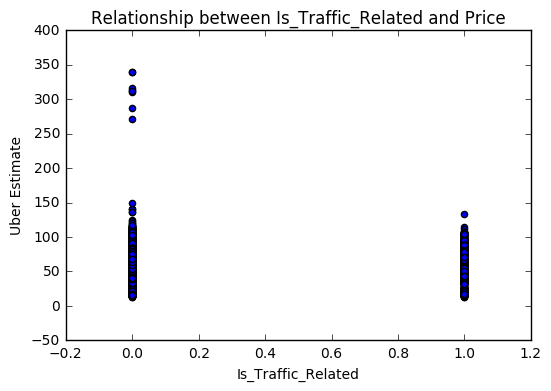

In [15]:
plt.scatter(df.Is_Traffic_Related, df.uber_estimate)
plt.xlabel("Is_Traffic_Related")
plt.ylabel("Uber Estimate")
plt.title("Relationship between Is_Traffic_Related and Price")
#plt.xlim([-1,168])

In [16]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df[['day_hour','weekday','Is_Traffic_Related']], df.uber_estimate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lm.coef_

array([ 0.18790695, -4.43978373, -5.89616343])

In [18]:
Y = lm.predict(df[['day_hour','weekday','Is_Traffic_Related']])

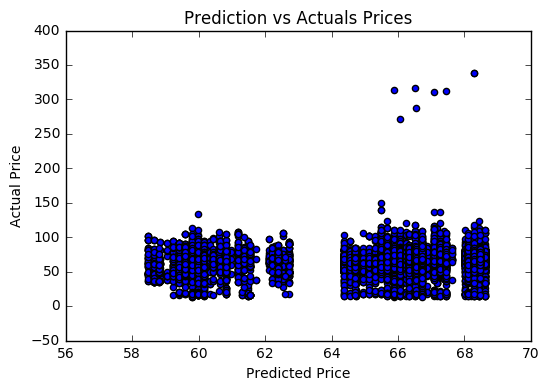

In [19]:
plt.scatter(Y, df.uber_estimate)
plt.title("Prediction vs Actuals Prices")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")

In [20]:
msePRC = np.mean((df.uber_estimate - lm.predict(df[['day_hour','weekday','Is_Traffic_Related']])) ** 2)
print (msePRC)
print (lm.coef_)

277.73990551743225
[ 0.18790695 -4.43978373 -5.89616343]


In [21]:
ESS = np.sum(lm.predict(df[['day_hour','weekday','Is_Traffic_Related']]) - np.mean(df.uber_estimate)) ** 2
RSS = np.sum((df.uber_estimate - lm.predict(df[['day_hour','weekday','Is_Traffic_Related']])) ** 2)
R2 = ESS/(ESS+RSS)
print (R2)
                           

6.76077422378e-30
